<a href="https://colab.research.google.com/github/suryagokul/Data-Science-Portfolio/blob/master/ML%20algorithms/Clustering/Clustering_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KMeans Clustering

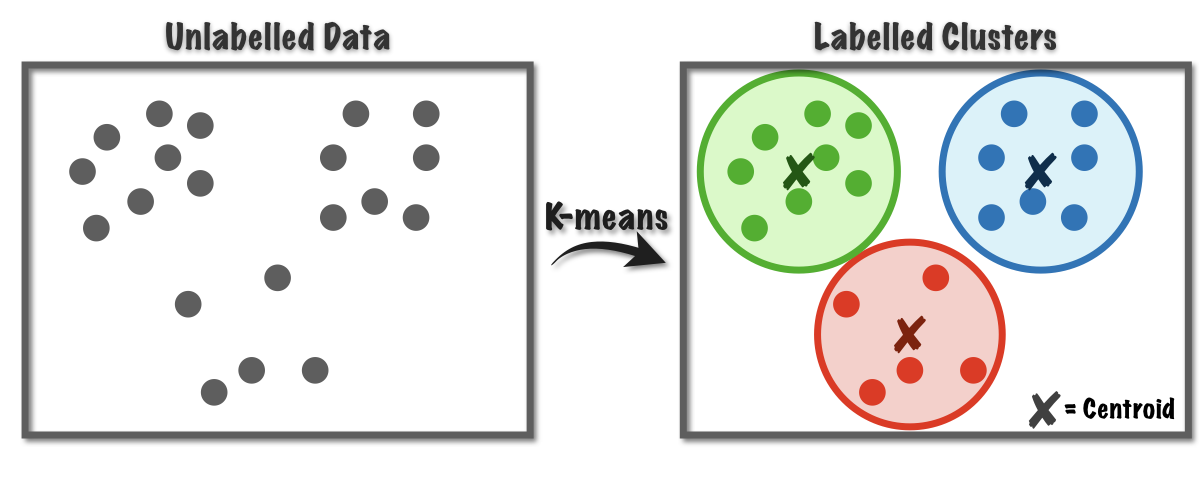



**K-means algorithm iteratively minimizes the distances between every data point and its centroid in order to find the most optimal solution for all the data points.**

**Steps:**

1. **k** random points of the data set are chosen to be centroids.
2. Distances between every data point and the kk centroids are calculated and stored.
3. Based on distance calculates, each point is assigned to the nearest cluster.
4. New cluster centroid positions are updated: similar to finding a mean in the point locations.
5. If the centroid locations changed, the process repeats from step 2, until the calculated new center stays the same, which signals that the clusters' members and centroids are now set.

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/13_kmeans/income.csv")

In [ ]:
df[:5]

Name  Age  Income($)
0      Rob   27      70000
1  Michael   29      90000
2    Mohan   29      61000
3   Ismail   28      60000
4     Kory   42     150000

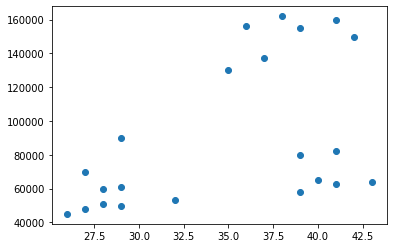

In [ ]:
plt.scatter(df.Age,df['Income($)'])

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
km = KMeans(n_clusters=3)

In [ ]:
y_pred = km.fit_predict(df[['Age','Income($)']])

In [ ]:
y_pred

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

In [ ]:
df['Cluster'] = y_pred

df[:5]

Name  Age  Income($)  Cluster
0      Rob   27      70000        0
1  Michael   29      90000        0
2    Mohan   29      61000        2
3   Ismail   28      60000        2
4     Kory   42     150000        1

In [ ]:
%matplotlib inline

Text(0, 0.5, 'Income($)')

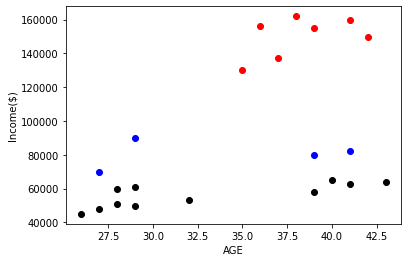

In [ ]:
df1 = df[df.Cluster==0]
df2 = df[df.Cluster==1]
df3 = df[df.Cluster==2]


plt.scatter(df1.Age,df1['Income($)'],color='blue')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')


plt.xlabel('AGE')
plt.ylabel('Income($)')

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
df[['Age','Income($)']] = scaler.fit_transform(df[['Age','Income($)']])

df[:5]

Name       Age  Income($)  Cluster
0      Rob  0.058824   0.213675        0
1  Michael  0.176471   0.384615        0
2    Mohan  0.176471   0.136752        2
3   Ismail  0.117647   0.128205        2
4     Kory  0.941176   0.897436        1

In [ ]:
y_pred = km.fit_predict(df[['Age','Income($)']])

In [ ]:
df['Cluster'] = y_pred

In [ ]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

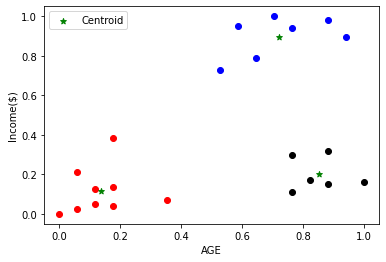

In [ ]:
df1 = df[df.Cluster==0]
df2 = df[df.Cluster==1]
df3 = df[df.Cluster==2]


plt.scatter(df1.Age,df1['Income($)'],color='blue')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='green',marker='*',label='Centroid')

plt.xlabel('AGE')
plt.ylabel('Income($)')
plt.legend()

In [ ]:
SSE  = []
k_rng = range(1,11)
for k in k_rng:
  KM = KMeans(n_clusters=k)
  KM.fit(df[['Age','Income($)']])
  SSE.append(KM.inertia_)

In [ ]:
SSE

[5.43401151198818,
 2.091136388699078,
 0.4750783498553096,
 0.3491047094419565,
 0.2621792762345213,
 0.21878010893330446,
 0.18146018747488601,
 0.14072448985352307,
 0.1062989742140513,
 0.07996937425152907]

Text(0, 0.5, 'SSE')

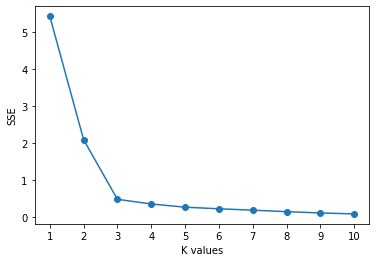

In [ ]:
plt.plot(k_rng,SSE,marker='o')

plt.xticks(k_rng)

plt.xlabel('K values')
plt.ylabel('SSE')

Here k=3 is our elbow after that there is no change.It is constant.

# KMeans on Iris Data

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
iris_df = pd.concat([pd.DataFrame(iris.data,columns=iris.feature_names),pd.DataFrame(iris.target,columns=['Flower'])],axis=1)

In [ ]:
iris_df[:4]

sepal length (cm)  sepal width (cm)  ...  petal width (cm)  Flower
0                5.1               3.5  ...               0.2       0
1                4.9               3.0  ...               0.2       0
2                4.7               3.2  ...               0.2       0
3                4.6               3.1  ...               0.2       0

[4 rows x 5 columns]

In [ ]:
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'Flower'],
      dtype='object')

In [ ]:
X = iris_df.drop('Flower',axis=1)

y = iris_df['Flower']

In [ ]:
model = KMeans(n_clusters=3)

model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

Text(0, 0.5, 'petal width')

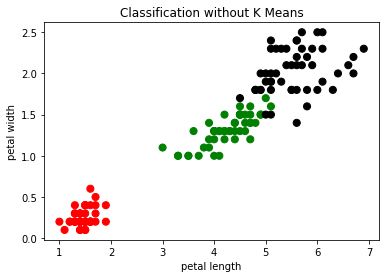

In [ ]:
colormap = np.array(['Red','Green','Black'])

plt.scatter(X['petal length (cm)'],X['petal width (cm)'],c=colormap[iris.target],s=50)

plt.title("Classification without K Means")

plt.xlabel('petal length')
plt.ylabel('petal width')

Text(0.5, 1.0, 'Classification with K Means')

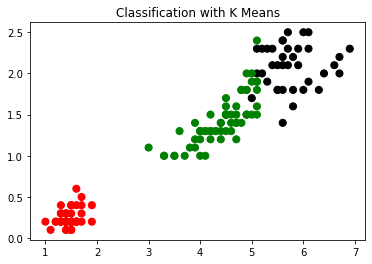

In [ ]:
plt.scatter(X['petal length (cm)'],X['petal width (cm)'],c=colormap[model.labels_],s=50)

plt.title("Classification with K Means")

In [ ]:
iris_df['Cluster no'] = model.labels_

In [ ]:
iris_df

sepal length (cm)  sepal width (cm)  ...  Flower  Cluster no
0                  5.1               3.5  ...       0           0
1                  4.9               3.0  ...       0           0
2                  4.7               3.2  ...       0           0
3                  4.6               3.1  ...       0           0
4                  5.0               3.6  ...       0           0
..                 ...               ...  ...     ...         ...
145                6.7               3.0  ...       2           2
146                6.3               2.5  ...       2           1
147                6.5               3.0  ...       2           2
148                6.2               3.4  ...       2           2
149                5.9               3.0  ...       2           1

[150 rows x 6 columns]

# Hierarichal Clustering

In [ ]:
from scipy.cluster.hierarchy import dendrogram,linkage

{'color_list': ['g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',

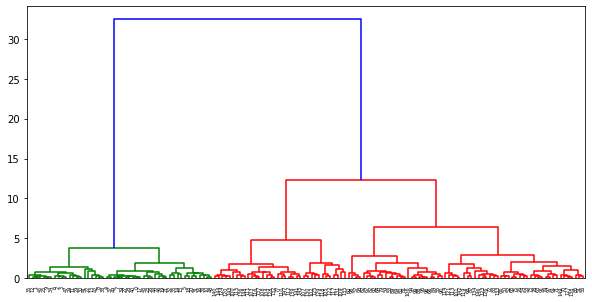

In [ ]:
plt.figure(figsize=(10,5))

dend = dendrogram(linkage(X,method='ward'))       #Dendogram gives an idea about what K value i.e clusters to select.

# linkage has ward ,averaage and completer for minimizing the distances between clusters.

dend

**How do we find optimal k value using Dendogram?**

We look for the largest distance that we can vertically without crossing any horizontal line.In this case Blue one is highest and there are 3 points are passing through that.**Therefore we can conclude that we have to use 3 Clusters.**

In [ ]:
from sklearn.cluster import AgglomerativeClustering

**Strategies for hierarchical clustering generally fall into two types:**

**1.Agglomerative:** This is a "bottom-up" approach: each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.

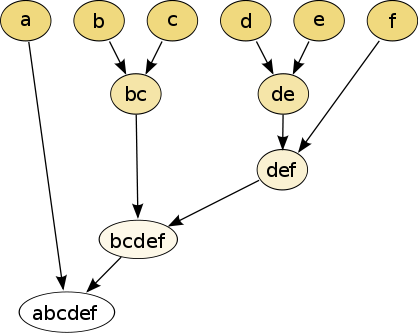

**2.Divisive:**In divisive or top-down clustering method we assign all the observations to a single cluster and then partition the cluster to two least similar clusters. Finally, we proceed recursively on each cluster until there is one cluster for each observation. 

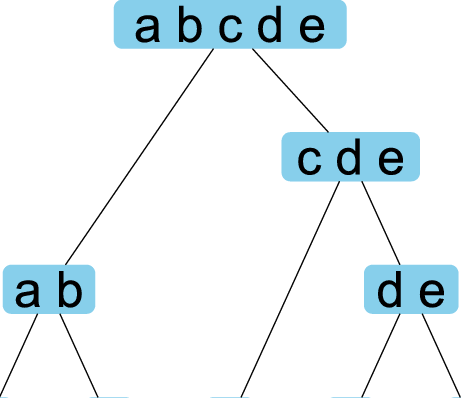

In [ ]:
cluster = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')

In [ ]:
cluster.fit_predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [ ]:
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

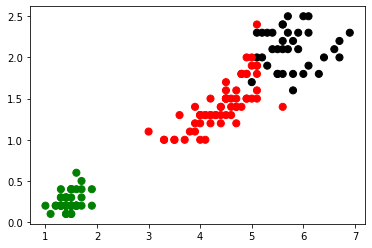

In [ ]:
plt.scatter(X['petal length (cm)'],X['petal width (cm)'],c=colormap[cluster.labels_],s=50)

# DBSCAN   (Density Based Spatial Clustering of Application With Noise)

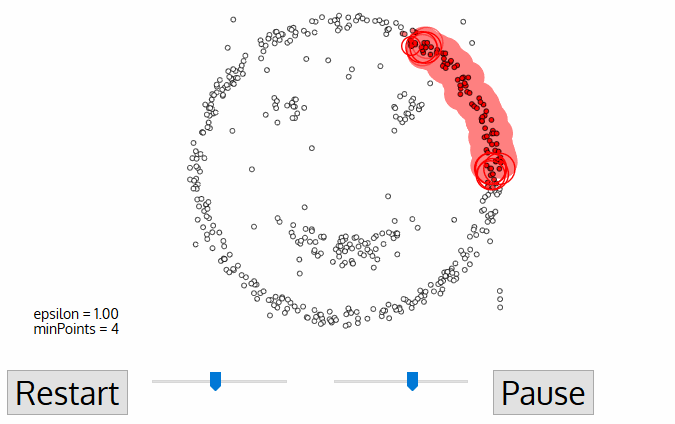

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs   # Used to create some random dataset.

In [ ]:
blob_X,_ = make_blobs(n_samples=200,n_features=2,centers=4,random_state=40)   # ,_ is taken because make_blobs returns labels i.e clusters.so we dont need.

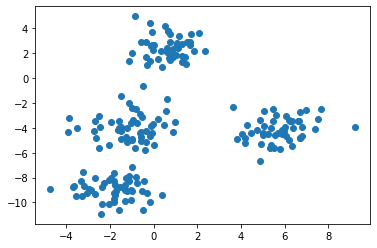

In [ ]:
df = pd.DataFrame(blob_X)

plt.scatter(df[0],df[1])

As we created 4 centers, So there are 4 different groups of data is created.

In [ ]:
dbs =  DBSCAN(eps=1.48,min_samples=5)    # By using epsilon value we creates circles.If the eps is high then our entire data comes in 1 cluster.

In [ ]:
dbs.fit_predict(blob_X)

array([ 0,  1,  0,  2,  0,  3,  3,  3,  0,  2,  2,  1,  3,  2,  0,  3,  3,
        1,  2,  3,  2,  0,  0,  2,  1,  3,  1,  0,  3,  1,  3,  0,  3,  1,
        3,  1,  0,  1,  0,  0,  0,  3,  1,  2,  1,  1,  3,  3,  2,  3,  3,
        0,  2,  0,  3,  0,  0,  0,  0,  0,  1,  0,  0,  1,  3,  2,  3,  2,
        0,  2,  2,  0,  1,  1,  1,  2,  3,  1,  0,  0,  2,  2, -1,  0,  1,
        2,  0,  0,  0,  3,  0,  1,  3,  0,  3,  0,  1,  3,  2,  1,  0,  1,
        2,  3,  0,  2,  3,  2,  3,  2,  0,  1,  1,  0,  0,  2,  2,  0,  3,
        1,  2,  3,  0,  1,  2,  2,  2,  2,  2,  3,  1,  0,  0,  2,  1,  2,
        1,  0,  2,  3,  3,  2,  3,  1,  0,  2,  2,  3,  2,  3,  1,  3,  1,
        3,  3,  3,  1,  3,  3,  1,  2,  3,  0,  2,  2,  3,  1,  3,  1,  0,
        1,  2,  2,  2,  1,  1,  1,  1,  3,  1,  1,  3,  0,  1,  1,  2,  3,
        3,  2,  1,  3,  0,  0,  2,  1,  2,  2,  3,  1,  0])

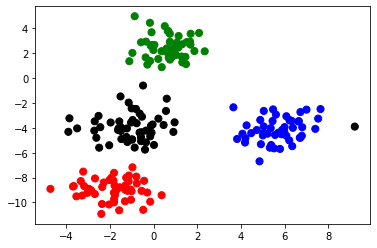

In [ ]:
custom_map = np.array(['Red','Green','Blue','Black'])

plt.scatter(blob_X[:,0],blob_X[:,1],c=custom_map[dbs.labels_],s=50)

**We must know the importace of Epsilon value.If we increased eps then it will looks something like below :**

In [ ]:
dbs1 =  DBSCAN(eps=10,min_samples=5) 

In [ ]:
dbs1.fit_predict(blob_X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

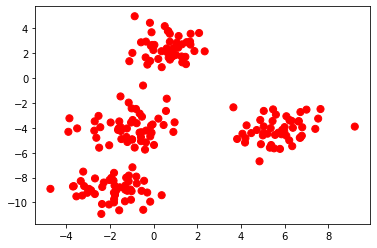

In [ ]:
custom_map = np.array(['Red','Green','Blue','Black'])

plt.scatter(blob_X[:,0],blob_X[:,1],c=custom_map[dbs1.labels_],s=50)

***It takes all data points into a single cluster.***